In [1]:
from sadkat.droplet import *

C:\Users\dh14661\AppData\Roaming\Python\Python39\site-packages\sadkat\solvents.py:292: RuntimeWarning: invalid value encountered in power
  return D_ref * (T / T_ref)**lam


In [2]:
def simulation_to_dataframe(time,
                            solution, ambient_temperature, ambient_RH,
                            initial_radius, initial_temperature, initial_mfs,
                            initial_velocity = np.zeros(3), # metres/second
                            initial_position = np.zeros(3), # metres/second
                            gravity = np.array([0, 0, 9.80665]),
                            gas_velocity = np.zeros(3),
                            rtol=1e-8,
                            terminate_on_equilibration=True, equ_threshold=1e-4,
                            terminate_on_efflorescence=False, eff_threshold=0.5):
    
    """
    
    A function with simiplified inputs which outputs a pandas dataframe with the simulation results.
    
    """

    gas = Atmosphere(ambient_temperature, ambient_RH, velocity= gas_velocity)
    droplet = UniformDroplet.from_mfs(solution,
                                      gas,
                                      gravity,
                                      initial_radius,
                                      initial_mfs,
                                      initial_temperature,
                                      initial_velocity,
                                      initial_position)
    trajectory = droplet.integrate(time, rtol=rtol,
                                   terminate_on_equilibration=terminate_on_equilibration,
                                   terminate_on_efflorescence=terminate_on_efflorescence,
                                   equ_threshold=equ_threshold, eff_threshold=eff_threshold)
    
    history = droplet.complete_trajectory(trajectory)
    return history

In [3]:
#choose a temperature
Experiment_T = 298

#make a list of RH valiues
RH_range = np.linspace(0, 1, 11)

#prepare empty list for results
outputs= []

#iterate through the list of RHs and run the dimulation, appending to the list.
for RH in RH_range:
    print("Running simulation for RH = " + str(round(100*RH)) + " %")
    outputs.append(simulation_to_dataframe(1, aqueous_KCl, Experiment_T, RH, 25e-6, Experiment_T, 0.0))
    

Running simulation for RH = 0 %
Running simulation for RH = 10 %
Running simulation for RH = 20 %
Running simulation for RH = 30 %
Running simulation for RH = 40 %
Running simulation for RH = 50 %
Running simulation for RH = 60 %
Running simulation for RH = 70 %
Running simulation for RH = 80 %
Running simulation for RH = 90 %
Running simulation for RH = 100 %


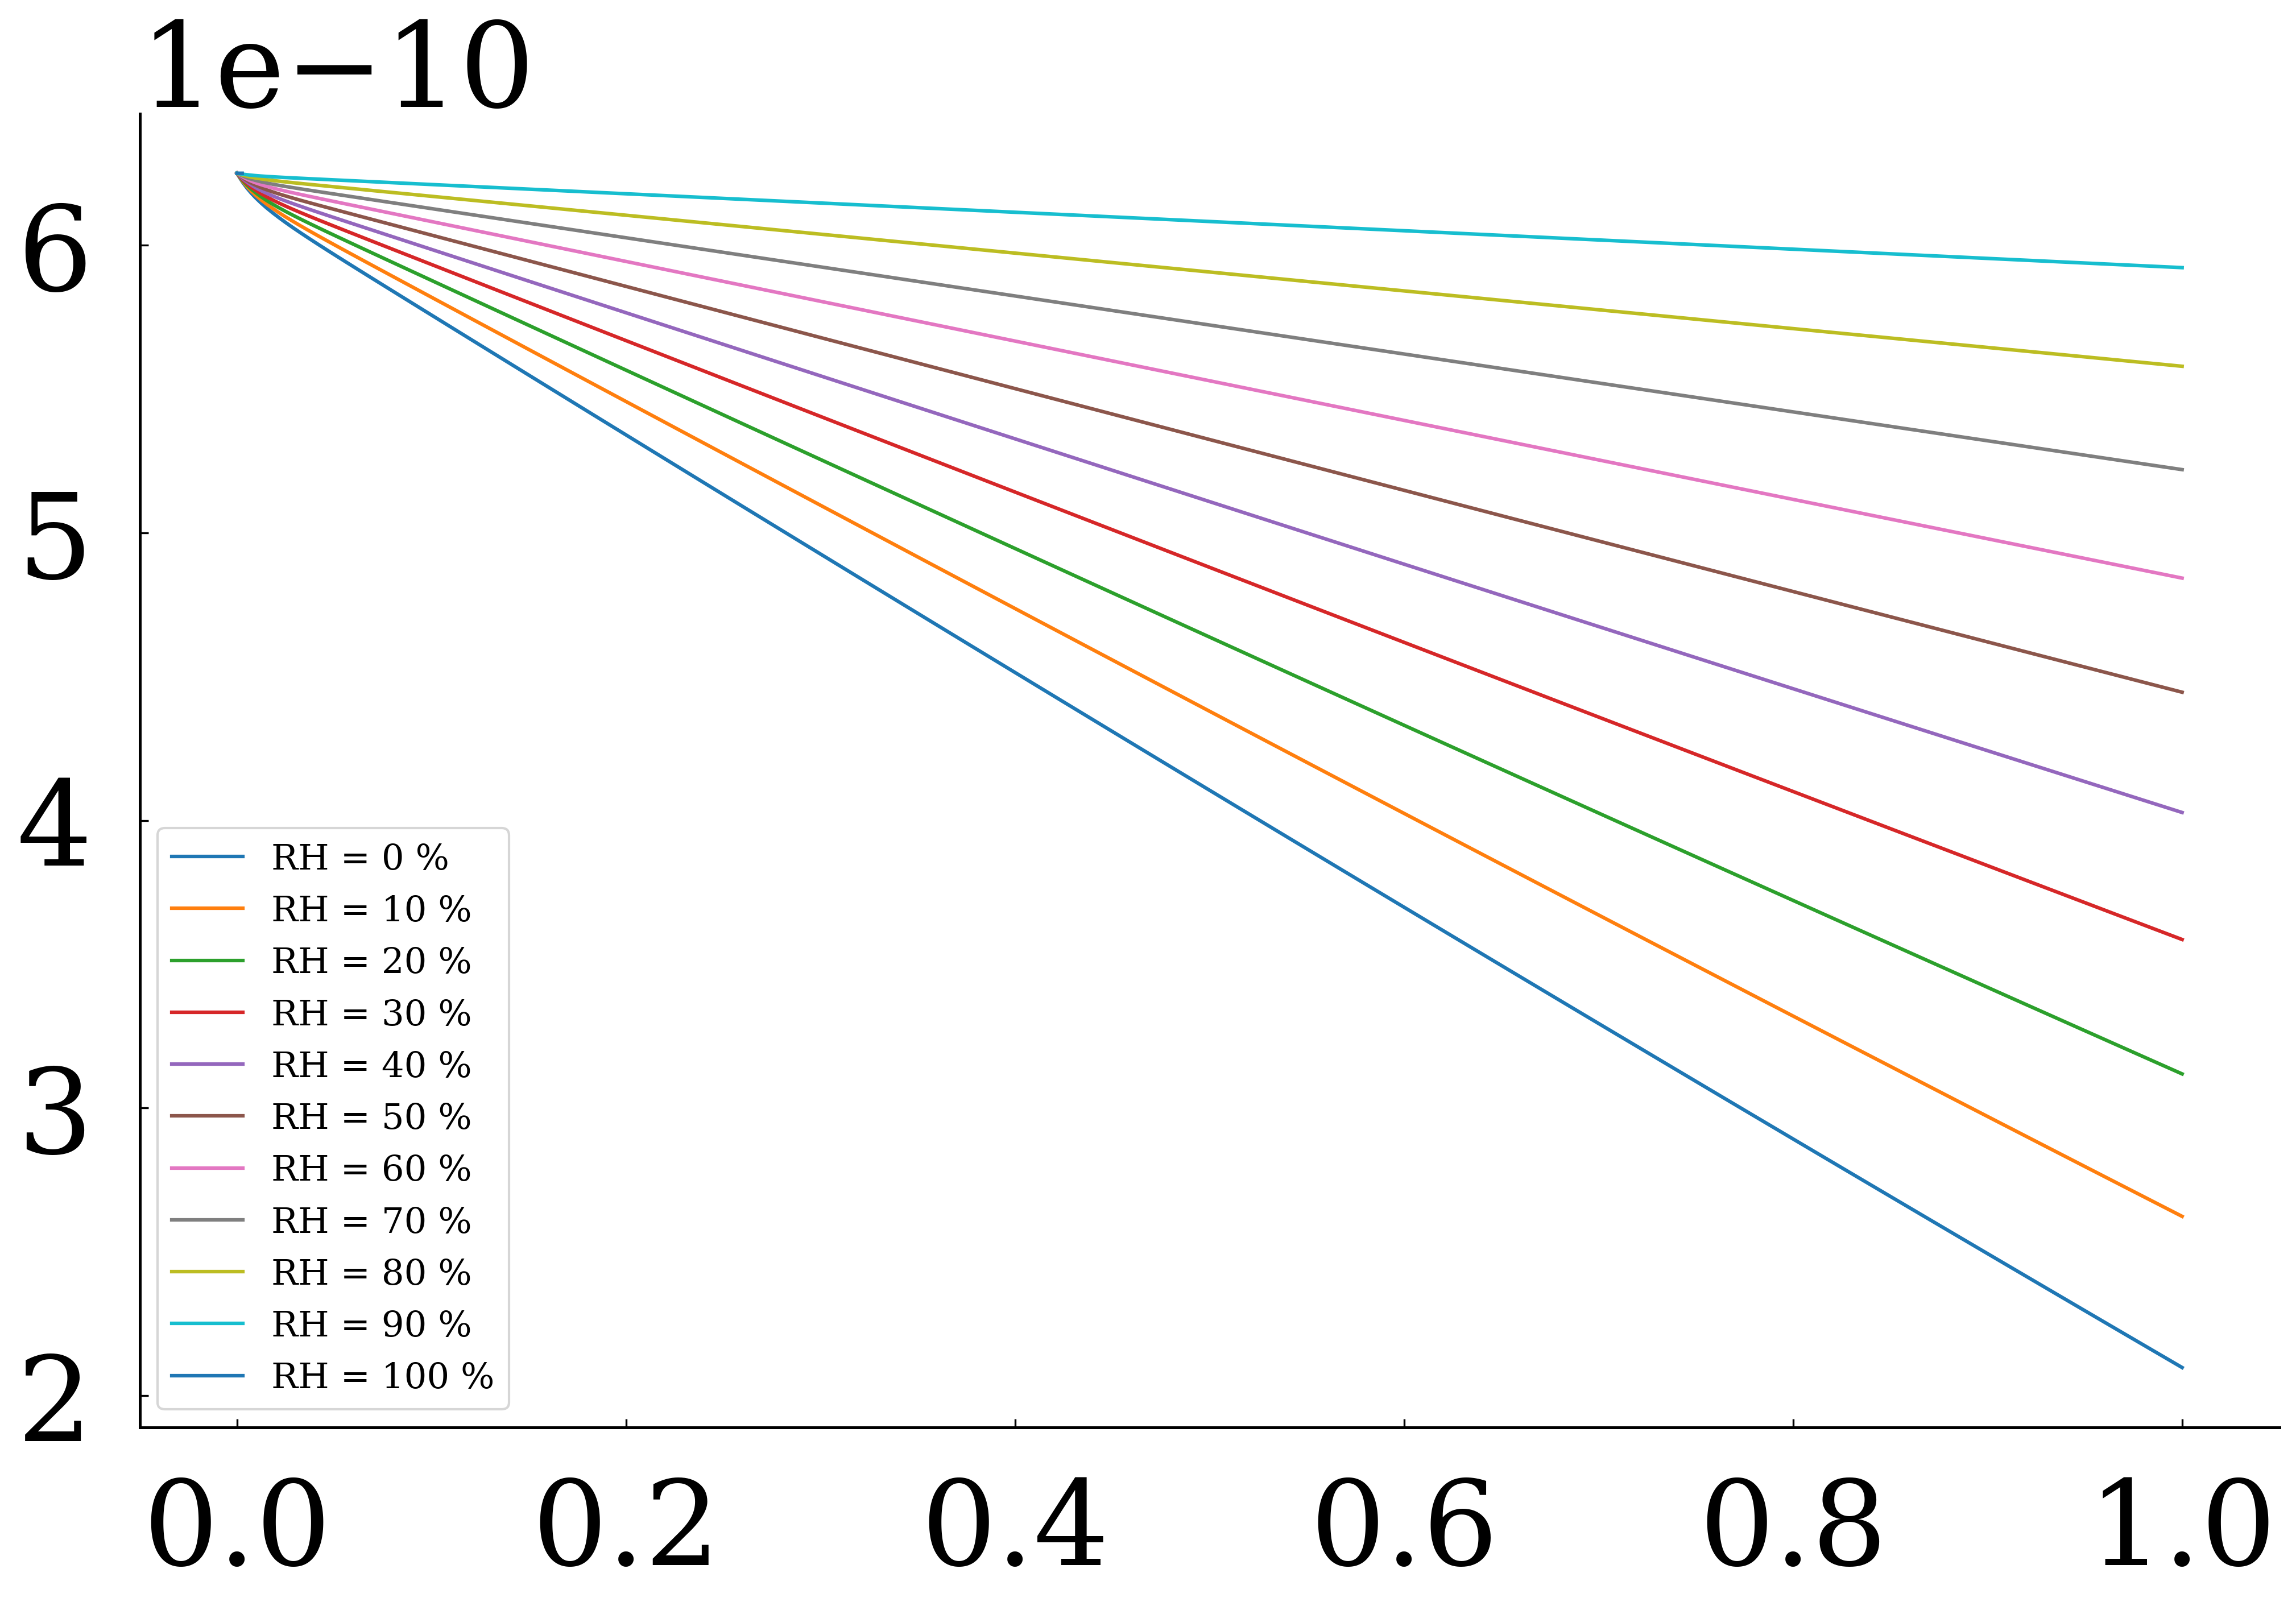

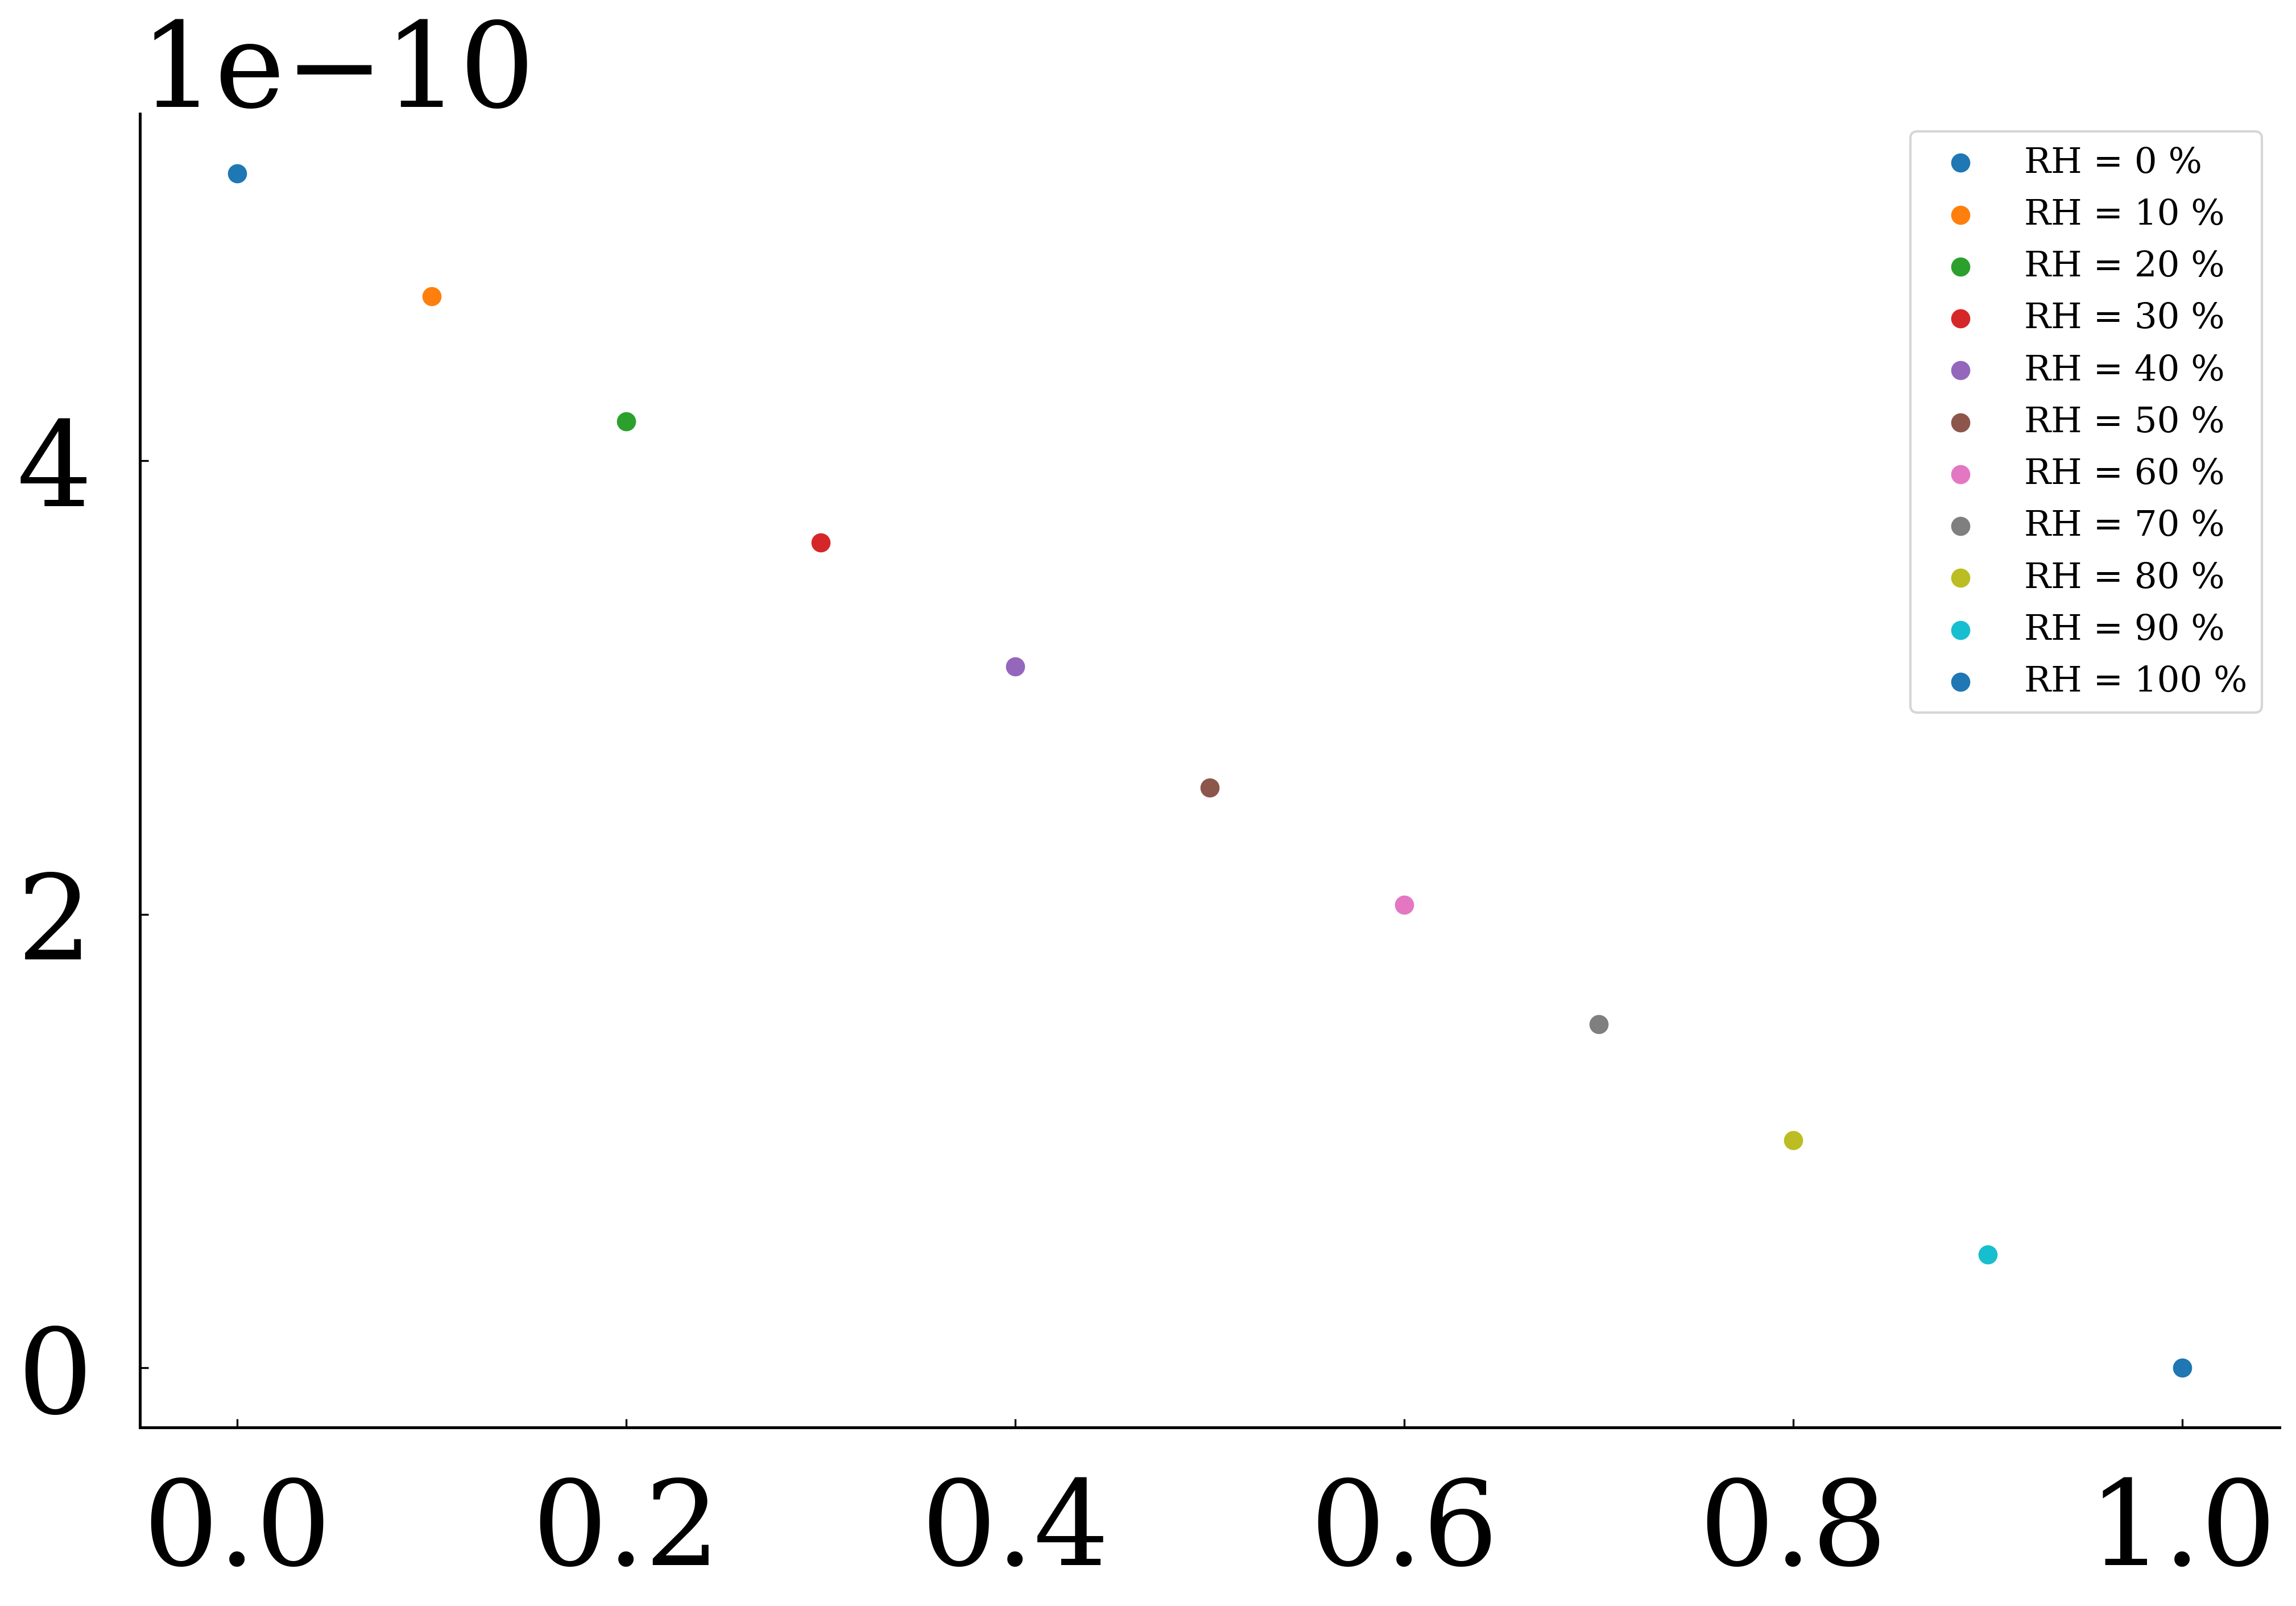

In [4]:
def get_evaporation_rate(t,r2):
    """An example function to find the evaporation rate based on the average gradient of r^2 data"""
    return -np.gradient(r2, t).mean()

#iterate thoguh the results and plot the results of r^2 vs t
for result, RH in zip(outputs, RH_range):
    plt.plot(result.time,
             result.radius **2,
             label = "RH = " + str(round(100*RH)) + " %")
plt.legend(fontsize = 15)
plt.show()

#iterate thoguh the results and plot the results of r^2 vs t
for result, RH in zip(outputs, RH_range):
    plt.scatter(RH,
                get_evaporation_rate(result.time, result.radius**2),
                s = 50,
                label = "RH = " + str(round(100*RH)) + " %")
plt.legend(fontsize = 15)
plt.show()